# Fake News Classifier With Bag of Words Concept

Dataset: https://www.kaggle.com/c/fake-news/data#

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/train.csv")
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
dataset.shape

(20800, 5)

In [ ]:
# drop NA values
dataset = dataset.dropna()
news_dataset = dataset.copy()
news_dataset.reset_index(inplace=True)
news_dataset.shape

(18285, 6)

# Text preprocessing

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(0, len(news_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', news_dataset['title'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
corpus[10]

'russian researcher discover secret nazi military base treasure hunter arctic photo'

In [ ]:
# Create Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
# ngram_range : 1 gram to 3 grams will be included as a feature, Barack - 1-gram, Barack Obama - 2-gram
cv = CountVectorizer(max_features=5000, ngram_range=(1,3)) 
X = cv.fit_transform(corpus).toarray()

y = news_dataset['label']
X.shape

(18285, 5000)

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
cv.get_feature_names()[:10]

['abandon',
 'abandoned',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'able',
 'abortion',
 'abroad',
 'absolutely']

In [ ]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,absurd,abuse,abuse new,abuse new york,academy,accept,accepting,access,access pipeline,access pipeline protest,accident,accidentally,accord,according,account,accusation,accused,accuser,accuses,acknowledge,acknowledge emf,acknowledge emf damage,acquittal,acquitted,across,act,act new,act new york,acting,action,...,xi,xi jinping,yahoo,yale,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yes,yet,yet another,yiannopoulos,yield,york,york city,york new,york new york,york state,york time,yorkers,young,young people,youth,youtube,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Multinomial Naive Bayes Algo

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [ ]:
from sklearn import metrics
import itertools

Accuracy Score:  0.8975973487986744
Confusion matrix, without normalization


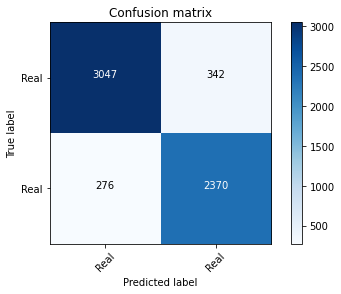

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Real'])

# Passive Aggressive Classifier Algorithm

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy Score:  0.9174813587406794
Confusion matrix, without normalization


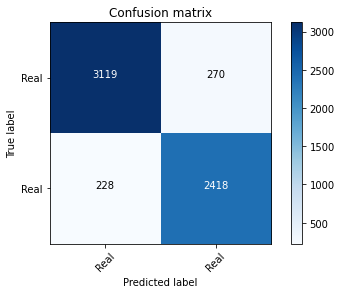

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Real', 'Real'])

# Determine words for Most Real and Fake news

In [ ]:
feature_name = cv.get_feature_names()

In [ ]:
classifier.coef_[0]

array([ -9.25708082,  -9.950228  ,  -8.56393364, ..., -10.64337518,
        -8.85161571,  -9.25708082])

In [ ]:
# Most Real
sorted(zip(classifier.coef_[0], feature_name), reverse=True)[:20]

[(-3.955020465033126, 'trump'),
 (-4.241457982252702, 'hillary'),
 (-4.3499559001334065, 'clinton'),
 (-4.966621376711606, 'election'),
 (-5.129946432814905, 'new'),
 (-5.196637807313578, 'comment'),
 (-5.231729127124848, 'video'),
 (-5.340070270920812, 'war'),
 (-5.365260519749371, 'hillary clinton'),
 (-5.370375620416141, 'fbi'),
 (-5.519411199576629, 'email'),
 (-5.531387390623344, 'world'),
 (-5.58712937363158, 'obama'),
 (-5.687548121378627, 'donald'),
 (-5.7161214938226825, 'donald trump'),
 (-5.738100400541458, 'russia'),
 (-5.799188092521296, 'day'),
 (-5.815061441677586, 'america'),
 (-5.855883436197842, 'american'),
 (-5.933844977667554, 'state')]

In [ ]:
# Most Fake
sorted(zip(classifier.coef_[0], feature_name))[:20]

[(-10.643375178979888, 'abe'),
 (-10.643375178979888, 'abroad'),
 (-10.643375178979888, 'abuse new'),
 (-10.643375178979888, 'abuse new york'),
 (-10.643375178979888, 'accord'),
 (-10.643375178979888, 'act new'),
 (-10.643375178979888, 'act new york'),
 (-10.643375178979888, 'advice'),
 (-10.643375178979888, 'adviser new'),
 (-10.643375178979888, 'adviser new york'),
 (-10.643375178979888, 'affordable'),
 (-10.643375178979888, 'age new'),
 (-10.643375178979888, 'age new york'),
 (-10.643375178979888, 'agenda breitbart'),
 (-10.643375178979888, 'ailes'),
 (-10.643375178979888, 'aleppo new'),
 (-10.643375178979888, 'aleppo new york'),
 (-10.643375178979888, 'ali'),
 (-10.643375178979888, 'america breitbart'),
 (-10.643375178979888, 'america new york')]

# Prepare submission data for kaggle

In [ ]:
test_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Interview Topics/Fake News Classifier/test.csv")
test_dataset.fillna('x', inplace=True)

In [ ]:
test_corpus = []
for i in range(0, len(test_dataset)):
  review = re.sub('[^a-zA-Z]', ' ', test_dataset['title'][i])
  review = review.lower()
  review = review.split()

  review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  test_corpus.append(review)

In [ ]:
X_submission = cv.fit_transform(test_corpus).toarray()
X_submission.shape

(5200, 5000)

In [ ]:
sub_pred_clf = classifier.predict(X_submission)
sub_pred_clf

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
test_dataset['label'] = sub_pred_clf.tolist()

In [ ]:
test_dataset = test_dataset[["id", "label"]]